### Contour plot of S sensitivity to P (Fig. S2)

In [1]:
#import required libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy
import pandas as pd
from scipy import stats as stats

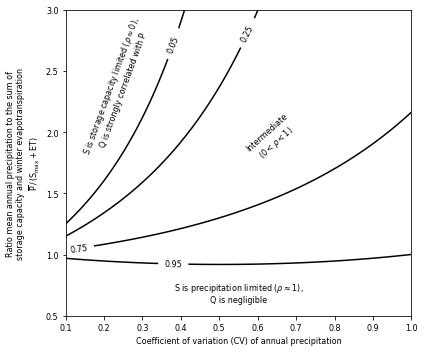

In [11]:
#create arrays of coefficient of variation of precip. and non-dimensional ratio of 
# mean precipitation / (max subsurface storage capacity + winter ET)
cv = np.linspace(0.1,1,200)
m = np.linspace(0.5,3,200)
m,cv = np.meshgrid(m,cv)
# Probability P - ET < Smax
# see derivation in Materials and Methods
x = 1/(cv**2*m)**(-1/cv**2)*(cv**2*m)**(-1/cv**2)*(scipy.special.gamma(1/cv**2) - scipy.special.gamma(1/cv**2)*scipy.special.gammaincc(1/cv**2,1/(cv**2*m)))*1/(scipy.special.gamma(1/cv**2))
rho = x*(x**2 - 3*x + 3)

f,ax = plt.subplots(1,figsize=(6,5))
CS = plt.contour(cv, m, rho, [0.05, 0.25, 0.75, 0.95], colors='k')

ax.set_xlabel(r'Coefficient of variation (CV) of annual precipitation', fontsize=8)
ylabel = 'Ratio mean annual precipitation to the sum of\nstorage capacity and winter evapotranspiration\n'
ylabel += r'$\mathrm{\overline{P}}\,/\,\left(\mathrm{S_{max} + ET}\right)$'
ax.set_ylabel(ylabel, fontsize=8)
plt.clabel(CS, fontsize=8, fmt='%1.2f')
titlestr = 'Contour plot of the spearman rank correlation\nbetween annual P and '
titlestr += r'$\mathrm{S}$'
an = r'$\mathrm{S}$' + r' is storage capacity limited ($\rho \approx 0$),' +'\nQ is strongly correlated with P\n'
ax.annotate(an, (0.16,.88), xycoords= 'axes fraction', rotation=70, ha='center', fontsize=8)
an = 'Intermediate\n'
an += r'($0<\rho<1 $)'
ax.annotate(an, (0.6,0.6), xycoords= 'axes fraction', rotation=42, ha='center', fontsize=8)
an = r'$\mathrm{S}$' + r' is precipitation limited ($\rho \approx 1$),' + '\nQ is negligible'
ax.annotate(an, (0.5,0.05), xycoords= 'axes fraction', rotation=0, ha='center', fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
f.tight_layout()
plt.savefig('../plots/simple_model_spearman.pdf', dpi=300)